In [1]:
import os
import tarfile
import urllib

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Getting Data

In [2]:
def get_data(url: str, filename: str, data_dir: str) -> None:
    """Fetches data from the url and saves it in the given directory with
    the given file name.
    
    Args:
        url (str): URL of the dataset.
        filename (str): Filename of the dataset.
        data_dir (str): The path of the directory where the data will be saved.
    """
    path = os.path.join(data_dir, filename[:filename.find('.')])
    if not os.path.isdir(path):
        os.makedirs(path)
    
    tar_path = os.path.join(path, filename)
    urllib.request.urlretrieve(url, tar_path)
    
    data = tarfile.open(tar_path)
    data.extractall(path=path)
    data.close()

In [3]:
def load_data(path: str) -> pd.DataFrame:
    """Loads the data in a DataFrame.
    
    Args:
        path (str): Path to the dataset.
    Returns:
        DataFrame
    """
    if os.path.isfile(path):
        data = pd.read_csv(path)
    else:
        raise Exception('File Not Found!')
    return data

In [4]:
DATA_DIR = "datasets"
DATA_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
FILENAME = 'housing.tgz'

In [5]:
get_data(DATA_URL, FILENAME, DATA_DIR)

In [6]:
data = load_data('datasets/housing/housing.csv')

## Exploratory Analysis

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


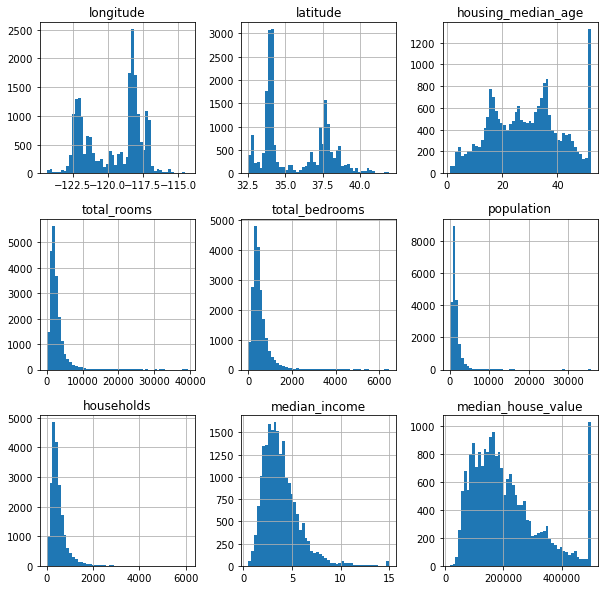

In [11]:
data.hist(bins=50, figsize=(10, 10))
plt.show()

## Feature Engineering

<AxesSubplot:>

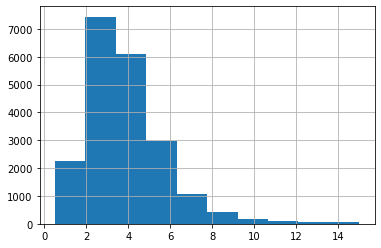

In [12]:
data['median_income'].hist()

In [13]:
data['median_income'] = pd.cut(data['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

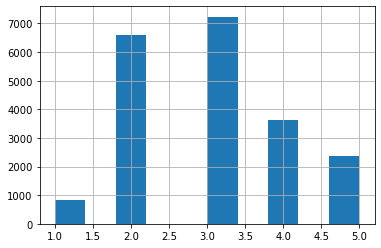

In [14]:
data['median_income'].hist()

<AxesSubplot:>

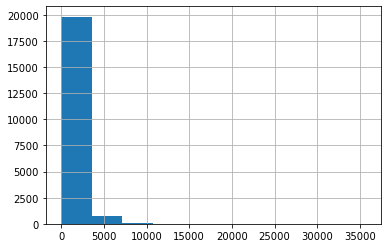

In [15]:
data['population'].hist()

<AxesSubplot:>

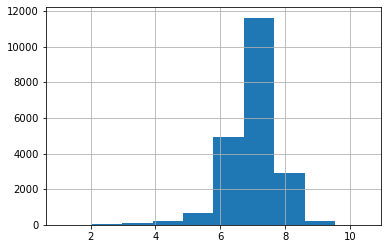

In [16]:
np.log(data['population']).hist()

In [17]:
data['population'] = np.log(data['population'])
data['total_bedrooms'] = np.log(data['total_bedrooms'])
data['total_rooms'] = np.log(data['total_rooms'])

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>]], dtype=object)

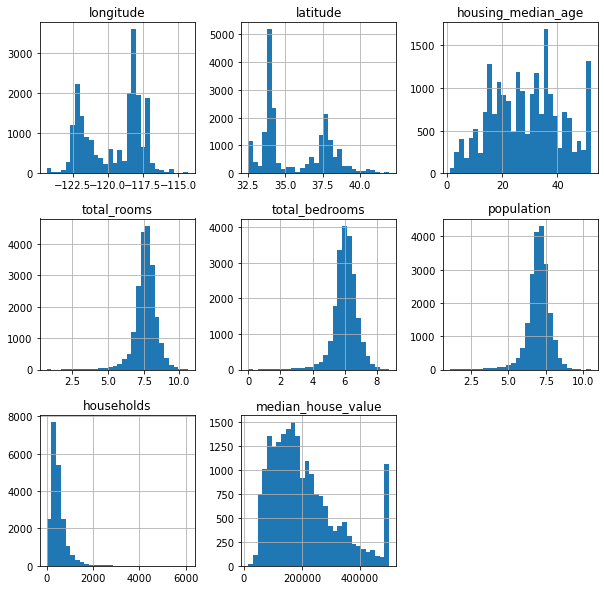

In [18]:
data.hist(bins=30, figsize=(10, 10))

## Feature Creation

In [19]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

In [20]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
total_rooms                 0.159227
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.052926
rooms_per_household        -0.016750
population                 -0.021158
population_per_household   -0.027827
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.191640
Name: median_house_value, dtype: float64

## Handle Categorical Attributes

In [21]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix=['ocean_proximity'], prefix_sep='_')

In [22]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,126.0,5,452600.0,0.053809,0.716795,0.045830,0,0,0,1,0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,1138.0,5,358500.0,0.007792,0.790340,0.006840,0,0,0,1,0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,177.0,5,352100.0,0.041192,0.719660,0.035065,0,0,0,1,0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,219.0,4,341300.0,0.032648,0.763587,0.028878,0,0,0,1,0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,259.0,3,342200.0,0.028550,0.762025,0.024467,0,0,0,1,0


## Check Missing Values

In [23]:
(data.isnull().sum() / data.shape[0]) * 100

longitude                     0.000000
latitude                      0.000000
housing_median_age            0.000000
total_rooms                   0.000000
total_bedrooms                1.002907
population                    0.000000
households                    0.000000
median_income                 0.000000
median_house_value            0.000000
rooms_per_household           0.000000
bedrooms_per_room             1.002907
population_per_household      0.000000
ocean_proximity_<1H OCEAN     0.000000
ocean_proximity_INLAND        0.000000
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.000000
ocean_proximity_NEAR OCEAN    0.000000
dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
colnames = data.columns
data = imputer.fit_transform(data)
data = pd.DataFrame(data, columns=colnames)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=colnames)

In [26]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.129255,-1.634226,-1.692016,-0.977033,1.890128,2.129631,0.643920,-1.968044,0.539023,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,1.648839,1.312871,1.028461,1.669961,1.890128,1.314156,-0.401730,-0.032640,-0.392848,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.449227,-1.103136,-1.107018,-0.843637,1.890128,1.258693,0.357220,-1.892638,0.281752,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.636925,-0.811591,-0.947530,-0.733781,0.941894,1.165100,0.163074,-0.736659,0.133880,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.311482,-0.571285,-0.930649,-0.629157,-0.006340,1.172900,0.069957,-0.777768,0.028436,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


## Train-Test Set Split

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)

In [28]:
(train_set.median_income.value_counts() / train_set.shape[0]) * 100

-0.006340    34.859496
-0.954574    31.746609
 0.941894    17.853682
 1.890128    11.567345
-1.902808     3.972868
Name: median_income, dtype: float64

In [29]:
(test_set.median_income.value_counts() / test_set.shape[0]) * 100

-0.006340    35.852713
-0.954574    32.437016
 0.941894    16.739341
 1.890128    10.949612
-1.902808     4.021318
Name: median_income, dtype: float64

## Stratified Split

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["median_income"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [31]:
(train_set.median_income.value_counts() / train_set.shape[0]) * 100

-0.006340    35.059351
-0.954574    31.885901
 0.941894    17.629603
 1.890128    11.440165
-1.902808     3.984981
Name: median_income, dtype: float64

In [32]:
(test_set.median_income.value_counts() / test_set.shape[0]) * 100

-0.006340    35.053295
-0.954574    31.879845
 0.941894    17.635659
 1.890128    11.458333
-1.902808     3.972868
Name: median_income, dtype: float64

## Modeling

In [33]:
x_train = train_set.drop(['median_house_value'], axis=1)
y_train = train_set['median_house_value']
x_test = test_set.drop(['median_house_value'], axis=1)
y_test = test_set['median_house_value']

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 16)
(16512,)
(4128, 16)
(4128,)


### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [36]:
lin_reg_predictions = lin_reg.predict(x_test)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

dcsn_tree = DecisionTreeRegressor()
dcsn_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
dcsn_predictions = dcsn_tree.predict(x_test)

## Evaluation

### Linear Regression

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('TRAIN')
print('MAE: ', mean_absolute_error(y_train, lin_reg.predict(x_train)))
print('MSE: ', mean_squared_error(y_train, lin_reg.predict(x_train)))
print('RMSE: ', mean_squared_error(y_train, lin_reg.predict(x_train), squared=False))
print('TEST')
print('MAE: ', mean_absolute_error(y_test, lin_reg_predictions))
print('MSE: ', mean_squared_error(y_test, lin_reg_predictions))
print('RMSE: ', mean_squared_error(y_test, lin_reg_predictions, squared=False))

TRAIN
MAE:  0.46880329439466417
MSE:  0.3881965622265032
RMSE:  0.6230542209362706
TEST
MAE:  0.4702076467536728
MSE:  0.3875639058583603
RMSE:  0.6225463082039442


### Decision Tree

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('TRAIN')
print('MAE: ', mean_absolute_error(y_train, dcsn_tree.predict(x_train)))
print('MSE: ', mean_squared_error(y_train, dcsn_tree.predict(x_train)))
print('RMSE: ', mean_squared_error(y_train, dcsn_tree.predict(x_train), squared=False))
print('TEST')
print('MAE: ', mean_absolute_error(y_test, dcsn_predictions))
print('MSE: ', mean_squared_error(y_test, dcsn_predictions))
print('RMSE: ', mean_squared_error(y_test, dcsn_predictions, squared=False))

TRAIN
MAE:  8.418115472569622e-18
MSE:  3.73839424864003e-33
RMSE:  6.114240957502435e-17
TEST
MAE:  0.3706363098485193
MSE:  0.3277765563200814
RMSE:  0.5725177345026802


## Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, x_train, y_train,
                                 scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-lin_reg_scores)

In [42]:
lin_reg_scores

array([0.61752001, 0.6236617 , 0.62604541, 0.62814802, 0.61323019,
       0.65149995, 0.60399324, 0.61475127, 0.64568723, 0.62380376])

In [43]:
np.mean(lin_reg_scores)

0.6248340789261573

In [44]:
np.std(lin_reg_scores)

0.013729376888083738

In [45]:
dcsn_scores = cross_val_score(dcsn_tree, x_train, y_train,
                                 scoring="neg_mean_squared_error", cv=10)
dcsn_scores = np.sqrt(-dcsn_scores)

In [46]:
dcsn_scores

array([0.60444422, 0.58010744, 0.57642105, 0.62460087, 0.56511521,
       0.65785471, 0.61107204, 0.61846591, 0.62330902, 0.61232511])

In [47]:
np.mean(dcsn_scores)

0.6073715591024287

In [48]:
np.std(dcsn_scores)

0.02599259534852034

## Tune Your Parameters

### Grid Search

In [49]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'loss': ['squared_error', 'huber'],
        'penalty': ['l1', 'l2'],
        'alpha': [0.0001, 0.1]
    },
    {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01]
    }
]

sgd = SGDRegressor()
grid_search = GridSearchCV(sgd, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

ValueError: The loss squared_error is not supported. 

In [50]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [51]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [52]:
mean_squared_error(y_test, grid_search.best_estimator_.predict(x_test), squared=False)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Random Search CV

In [53]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {
        'loss': ['squared_error', 'huber'],
        'penalty': ['l1', 'l2'],
        'alpha': [0.0001, 0.1]
    },
    {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01]
    }
]

sgd = SGDRegressor()
rnd_search = RandomizedSearchCV(sgd, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

rnd_search.fit(x_train, y_train)

ValueError: The loss squared_error is not supported. 

In [54]:
rnd_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [55]:
mean_squared_error(y_test, rnd_search.best_estimator_.predict(x_test), squared=False)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'